In [1]:
import sys
print(sys.version) # 3.12
import numpy as np # !pip3 install numpy
import pandas as pd # !pip3 install pandas
import matplotlib.pyplot as plt # !pip3 install matplotlib
import seaborn as sns # !ip install seaborn
sns.set_theme()
import yfinance as yf # !pip3 install yfinance
from statsmodels.tsa.api import ExponentialSmoothing # !pip3 install statsmodels

3.11.6 (main, Oct  2 2023, 13:45:54) [Clang 15.0.0 (clang-1500.0.40.1)]


In [2]:
def retrieve_hist_assets(assets: list, window_range="2y") -> list:
    """Retrieve asset history values.

    Ecrire une fonction qui prend en entrée une liste de 5 actifs et qui renvoie les prix journaliers sur
    une fenêtre de 2 à 3 ans (le choix est donné à l’utilisateur) à partir de Yahoo Finance.

    N.B.:
        - package link: https://pypi.org/project/yfinance/
    :param assets: list of assets (max 5)
    :return: asset historical list
    """
    if len(assets) > 5:
        raise ValueError("On ne peut pas avoir plus de 5 assets!")
    if not window_range in ["2y", "3y"]:
        raise ValueError("Tu peux seulement demander 2y -> historique 2 ans ou 3y -> ...")
    df = pd.DataFrame()
    for asset in assets:
        msft = yf.Ticker(asset)
        hist = msft.history(period=window_range)
        hist_df = pd.DataFrame(hist)
        hist_df["actif"] = asset
        hist_df = hist_df.reset_index()
        if df.empty:
            df = hist_df.copy()
        else:
            df = pd.concat([df, hist_df])
    df["jour"] = df.Date.dt.strftime('%Y-%m-%d')
    df["mois"] = df.Date.dt.strftime('%Y-%m')
    df["annee"] = df.Date.dt.strftime('%Y')
    df = df.drop(columns=["Dividends", "Stock Splits"])
    return df.reset_index()

df = retrieve_hist_assets(assets=["AAPL", "MSFT", "AMZN", "GOOG", "TSLA"], window_range="2y")
df.sample(30)

,index,Date,Open,High,Low,Close,Volume,actif,jour,mois,annee
1760,251,2023-01-04 00:00:00-05:00,91.010002,91.239998,87.800003,88.709999,27046500,GOOG,2023-01-04,2023-01,2023
945,442,2023-10-09 00:00:00-04:00,324.092209,329.630955,322.525382,329.151947,19891200,MSFT,2023-10-09,2023-10,2023
2180,168,2022-09-06 00:00:00-04:00,272.679993,275.989990,265.739990,274.420013,55860000,TSLA,2022-09-06,2022-09,2022
1858,349,2023-05-25 00:00:00-04:00,125.209999,125.980003,122.900002,124.349998,33812700,GOOG,2023-05-25,2023-05,2023
499,499,2023-12-29 00:00:00-05:00,193.899994,194.399994,191.729996,192.529999,42628800,AAPL,2023-12-29,2023-12,2023
675,172,2022-09-12 00:00:00-04:00,262.703734,264.354418,262.090915,263.563660,18747700,MSFT,2022-09-12,2022-09,2022
2254,242,2022-12-20 00:00:00-05:00,146.050003,148.470001,137.660004,137.800003,159563300,TSLA,2022-12-20,2022-12,2022
733,230,2022-12-02 00:00:00-05:00,247.624361,253.809509,247.495499,252.778656,21528500,MSFT,2022-12-02,2022-12,2022
1453,447,2023-10-16 00:00:00-04:00,130.690002,133.070007,130.429993,132.550003,42832900,AMZN,2023-10-16,2023-10,2023
795,292,2023-03-06 00:00:00-05:00,254.812879,258.479611,254.365720,255.250107,24109800,MSFT,2023-03-06,2023-03,2023


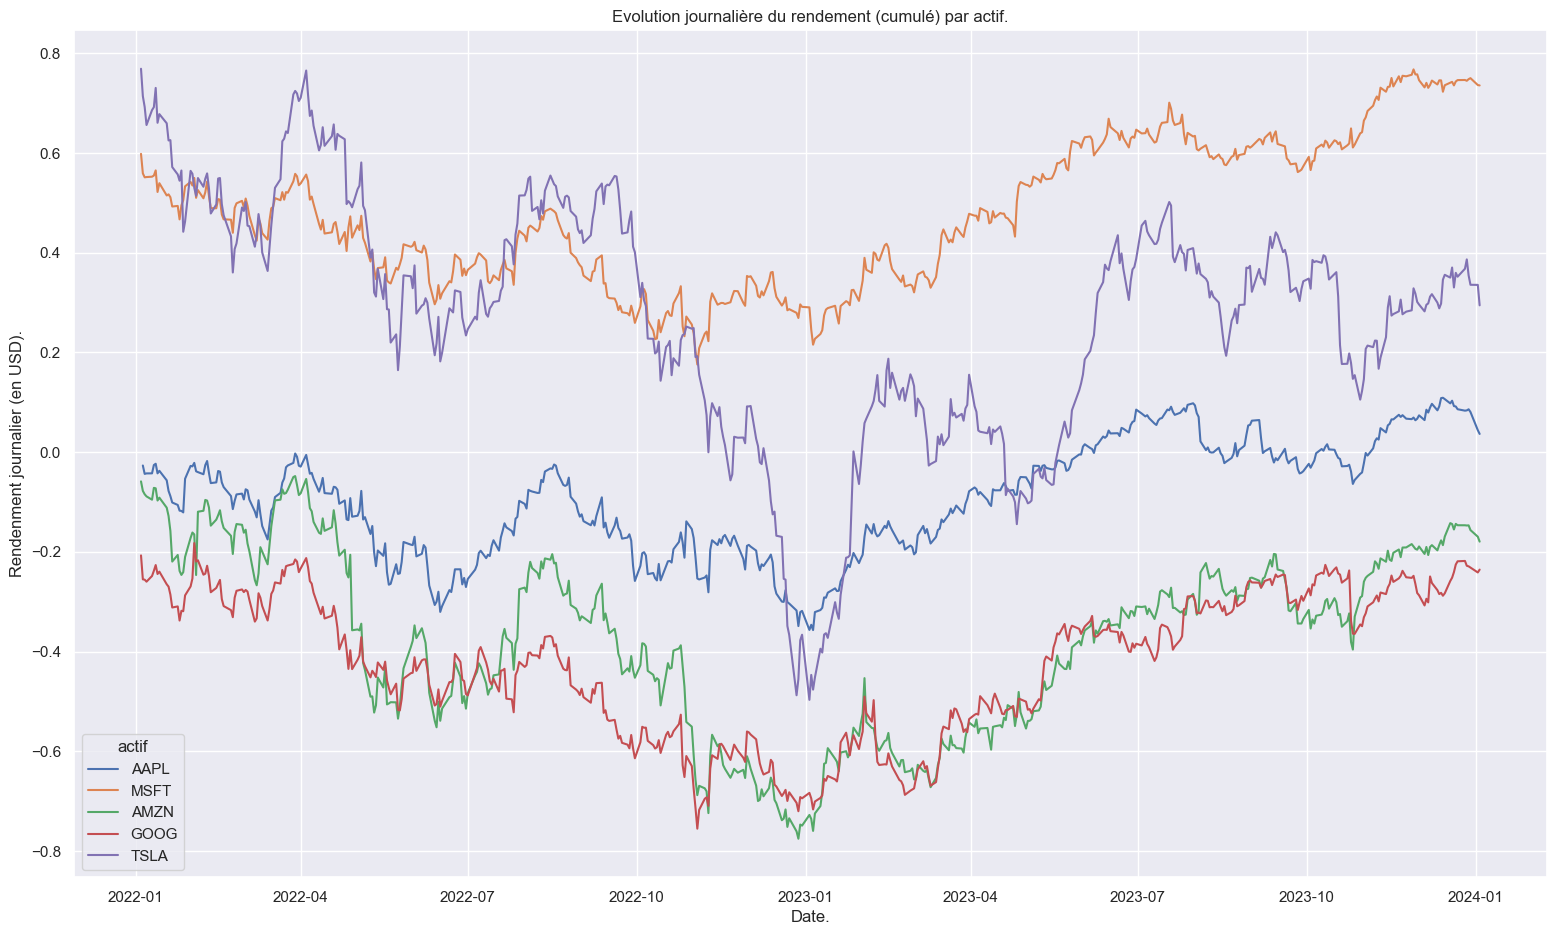

,index,Date,Open,High,Low,Close,Volume,actif,jour,mois,annee,Rendement_quotidien,Rendement_mensuel_mean,Rendement_annuel_mean
2480,472,2023-11-20 00:00:00-05:00,234.039993,237.100006,231.020004,235.600006,116320100,TSLA,2023-11-20,2023-11,2023,0.005533,0.008498,0.002842
2481,473,2023-11-21 00:00:00-05:00,235.039993,243.619995,233.339996,241.199997,122288000,TSLA,2023-11-21,2023-11,2023,0.023491,0.008498,0.002842
2482,474,2023-11-22 00:00:00-05:00,242.039993,244.009995,231.399994,234.210007,117950600,TSLA,2023-11-22,2023-11,2023,-0.029408,0.008498,0.002842
2483,475,2023-11-24 00:00:00-05:00,233.750000,238.750000,232.330002,235.449997,65125200,TSLA,2023-11-24,2023-11,2023,0.005280,0.008498,0.002842
2484,476,2023-11-27 00:00:00-05:00,236.889999,238.330002,232.100006,236.080002,112031800,TSLA,2023-11-27,2023-11,2023,0.002672,0.008498,0.002842
2485,477,2023-11-28 00:00:00-05:00,236.679993,247.000000,234.009995,246.720001,148549900,TSLA,2023-11-28,2023-11,2023,0.044083,0.008498,0.002842
2486,478,2023-11-29 00:00:00-05:00,249.210007,252.750000,242.759995,244.139999,135401300,TSLA,2023-11-29,2023-11,2023,-0.010512,0.008498,0.002842
2487,479,2023-11-30 00:00:00-05:00,245.139999,245.220001,236.910004,240.080002,132353200,TSLA,2023-11-30,2023-11,2023,-0.016770,0.008498,0.002842
2488,480,2023-12-01 00:00:00-05:00,233.139999,240.190002,231.899994,238.830002,121173500,TSLA,2023-12-01,2023-12,2023,-0.005220,0.001720,0.002842
2489,481,2023-12-04 00:00:00-05:00,235.750000,239.369995,233.289993,235.580002,104099800,TSLA,2023-12-04,2023-12,2023,-0.013701,0.001720,0.002842


In [23]:
def get_rendement(df: pd.DataFrame) -> pd.DataFrame:
    """
    Écrire une fonction qui calcule le rendement quotidien de chaque actif. Intégrez dans cette fonction
    une variable pour calculer le rendement espéré annualisé de chaque actif. Représentez dans le
    même graphique les rendements quotidiens des 5 actifs avec des légendes claires.
    
    N.B.:
        - I used np.log -> est-ce que c'est le bon log -> validé
        - d'ailleurs shift(1) ou shift(-1) -> shift 1
        - sum cumulé sur le lineplot?
        - à refaire avec le log en maplotlib????
        - Changer le nom de la colonne Rendement_Qtot en Rendement_quotidien?
        - Rotate des labels?
    """
    new_df = df.copy()
    new_df["Rendement_quotidien"] = np.log(
        new_df.Close/new_df.Close.shift(1)
    )
    rendement_moyen_annuel_df = (
        new_df
        .groupby(["annee", "actif"])
        .agg({"Rendement_quotidien": "mean"})
        .reset_index()
        .rename(
            columns={"Rendement_quotidien": "Rendement_annuel_mean"}
        )
    )
    new_df = (
        pd.merge(
            left=new_df,
            right=rendement_moyen_annuel_df,
            on=["actif", "annee"],
            how="left",
        )
    )
    plt.figure(figsize=(19, 11))
    plt.title("Evolution journalière du rendement (cumulé) par actif.")
    plt.ylabel("Rendenment journalier (en USD).")
    plt.xlabel("Date.")
    new_df["Rendement_quotidien_cumul"] = new_df["Rendement_quotidien"].cumsum()
    sns.lineplot(x=new_df["Date"], y=new_df["Rendement_quotidien_cumul"], hue=new_df["actif"])
    plt.show()
    return new_df

df_2 = get_rendement(df=df)
df_2.tail(30)

In [25]:
def get_volatility_and_export_to_csv(df: pd.DataFrame, filename="loulou.csv", nb_open=252) -> pd.DataFrame:
    """Compute volatility(daily, monthly & annualy) and export result to .csv

    Écrire une fonction pour calculer la volatilité quotidienne et mensuelle de chaque actif, stockant les
    résultats dans un fichier .csv. Définissez une autre variable pour calculer la volatilité annualisée de
    chaque actif.

    N.B.:
        - https://medium.com/@polanitzer/volatility-calculation-in-python-estimate-the-annualized-volatility-of-historical-stock-prices-db937366a54d
        - https://blog.quantinsti.com/volatility-and-measures-of-risk-adjusted-return-based-on-volatility/
        - https://pyquantnews.com/how-to-compute-volatility-6-ways/
        - integrate squared into agg?
        - Merge all at once?
        - not clean
        - select before merging to avoid to drop columns
    """
    tmp_df = df.copy()
    tmp_df["Rendement_quotidien_squared"] = tmp_df["Rendement_quotidien"] ** 2
    tmp_df["Rendement_mensuel_mean_squared"] = tmp_df["Rendement_mensuel_mean"] ** 2
    tmp_df["Rendement_annuel_mean_squared"] = tmp_df["Rendement_annuel_mean"] ** 2
    print("Calcul volatilité quotidienne.")
    df_vol_daily = (
        tmp_df
        .groupby(["actif", "jour"])
        .agg({"Rendement_quotidien_squared": "sum"})
        .reset_index()
    )
    df_vol_daily["Daily_volatility"] = np.sqrt(df_vol_daily["Rendement_quotidien_squared"] / nb_open)
    print("Calcul volatilité mensuel.")
    df_vol_month = (
        tmp_df
        .groupby(["actif", "mois"])
        .agg({"Rendement_mensuel_mean_squared": "sum", "index": "count"})
        .reset_index()
    )
    df_vol_month["Monthly_volatility"] = np.sqrt(df_vol_month["Rendement_mensuel_mean_squared"] / df_vol_month["index"])
    print("Calcul volatilité annuel.")
    df_vol_year = (
        tmp_df
        .groupby(["actif", "annee"])
        .agg({"Rendement_annuel_mean_squared": "sum", "index": "count"})
        .reset_index()
    )
    df_vol_year["Annual_volatility"] = np.sqrt(df_vol_year["Rendement_annuel_mean_squared"] / df_vol_year["index"])
    tmp_df = (
        pd.merge(
            left=tmp_df,
            right=df_vol_daily.drop(columns=["Rendement_quotidien_squared"]),
            left_on=["actif", "jour"],
            right_on=["actif", "jour"],
            how="left",
        )
    )
    tmp_df = (
        pd.merge(
            left=tmp_df,
            right=df_vol_month.drop(columns=["Rendement_mensuel_mean_squared"]),
            left_on=["actif", "mois"],
            right_on=["actif", "mois"],
            how="left",
        )
        .drop(columns=["index_y"])
        .rename(columns={"index_x": "index"})
    )
    tmp_df = (
        pd.merge(
            left=tmp_df,
            right=df_vol_year.drop(columns=["Rendement_annuel_mean_squared"]),
            left_on=["actif", "annee"],
            right_on=["actif", "annee"],
            how="left",
        )
        .drop(columns=["index_y"])
        .rename(columns={"index_x": "index"})
    )
    tmp_df = tmp_df.drop(columns=["Rendement_quotidien_squared", "Rendement_mensuel_mean_squared", "Rendement_annuel_mean_squared"])
    print(f"Creation du fichier: {filename}")
    tmp_df.drop(columns=["index"]).to_csv(filename, index=False, sep=";")
    return tmp_df

df_3 = get_volatility_and_export_to_csv(df=df_2)
df_3.sample(20)

Calcul volatilité quotidienne.
Calcul volatilité mensuel.
Calcul volatilité annuel.
Creation du fichier: loulou.csv


,index,Date,Open,High,Low,Close,Volume,actif,jour,mois,annee,Rendement_quotidien,Rendement_mensuel_mean,Rendement_annuel_mean,Daily_volatility,Monthly_volatility,Annual_volatility
2018,10,2022-01-19 00:00:00-05:00,347.236664,351.556671,331.666656,331.883331,75442500,TSLA,2022-01-19,2022-01,2022,-0.034413,0.042082,-0.000249,0.002168,0.042082,0.000249
581,79,2022-04-28 00:00:00-04:00,280.638367,286.335967,276.967887,285.007507,33646600,MSFT,2022-04-28,2022-04,2022,0.022380,-0.005261,0.001216,0.001410,0.005261,0.001216
131,131,2022-07-14 00:00:00-04:00,142.843448,147.671646,142.020569,147.195770,78140700,AAPL,2022-07-14,2022-07,2022,0.020276,0.008640,-0.001300,0.001277,0.008640,0.001300
1699,193,2022-10-11 00:00:00-04:00,98.250000,100.120003,97.250000,98.050003,21617700,GOOG,2022-10-11,2022-10,2022,-0.006709,-0.000744,-0.002098,0.000423,0.000744,0.002098
2149,141,2022-07-28 00:00:00-04:00,280.066681,283.299988,272.799988,280.899994,84723000,TSLA,2022-07-28,2022-07,2022,0.021882,0.014024,-0.000249,0.001378,0.014024,0.000249
591,89,2022-05-12 00:00:00-04:00,253.577247,255.732297,246.029663,251.274597,51033800,MSFT,2022-05-12,2022-05,2022,-0.020160,-0.000869,0.001216,0.001270,0.000869,0.001216
1652,146,2022-08-04 00:00:00-04:00,118.300003,119.500000,117.709999,118.870003,15757700,GOOG,2022-08-04,2022-08,2022,0.000757,-0.002886,-0.002098,0.000048,0.002886,0.002098
877,375,2023-07-05 00:00:00-04:00,333.704728,340.237606,333.346231,336.752075,18172400,MSFT,2023-07-05,2023-07,2023,0.000473,-0.000683,0.001778,0.000030,0.000683,0.001778
2469,461,2023-11-03 00:00:00-04:00,221.149994,226.369995,218.399994,219.960007,119281000,TSLA,2023-11-03,2023-11,2023,0.006614,0.008498,0.002842,0.000417,0.008498,0.002842
2485,477,2023-11-28 00:00:00-05:00,236.679993,247.000000,234.009995,246.720001,148549900,TSLA,2023-11-28,2023-11,2023,0.044083,0.008498,0.002842,0.002777,0.008498,0.002842


,index,Date,Open,High,Low,Close,Volume,actif,jour,mois,annee,Rendement_Qtot,Rendement_Qtot_mean_month,Rendement_Qtot_mean_year,Daily_volatility,Monthly_volatility,Annual_volatility,Daily_volatility_ewm12
257,257,2023-01-12 00:00:00-05:00,133.135830,133.513708,130.709391,132.668442,71379600,AAPL,2023-01-12,2023-01,2023,-0.000600,0.005241,0.001595,0.000600,0.005241,0.001595,0.015779
1377,373,2023-06-30 00:00:00-04:00,129.470001,131.250000,128.949997,130.360001,54310500,AMZN,2023-06-30,2023-06,2023,0.019051,0.003714,0.002371,0.019051,0.003714,0.002371,0.013683
285,285,2023-02-23 00:00:00-05:00,149.483632,149.732622,146.645155,148.796417,48394200,AAPL,2023-02-23,2023-02,2023,0.003285,0.001206,0.001595,0.003285,0.001206,0.001595,0.012625
427,427,2023-09-18 00:00:00-04:00,176.247795,179.143988,175.938205,177.735840,67257600,AAPL,2023-09-18,2023-09,2023,0.016772,-0.004643,0.001595,0.016772,0.004643,0.001595,0.012222
301,301,2023-03-17 00:00:00-04:00,155.449418,156.106755,153.656687,154.373779,98944600,AAPL,2023-03-17,2023-03,2023,-0.005469,0.004875,0.001595,0.005469,0.004875,0.001595,0.012545
1031,27,2022-02-11 00:00:00-05:00,158.134506,159.000000,152.733994,153.293503,77100000,AMZN,2022-02-11,2022-02,2022,-0.036572,0.001385,-0.005937,0.036572,0.001385,0.005937,0.032107
359,359,2023-06-09 00:00:00-04:00,181.016751,181.744803,180.149072,180.478195,48870700,AAPL,2023-06-09,2023-06,2023,0.002157,0.004292,0.001595,0.002157,0.004292,0.001595,0.007715
230,230,2022-12-02 00:00:00-05:00,145.148711,147.177365,144.840421,146.988419,65447400,AAPL,2022-12-02,2022-12,2022,-0.003377,-0.006210,-0.001279,0.003377,0.006210,0.001279,0.018867
91,91,2022-05-16 00:00:00-04:00,144.300817,146.253911,142.942565,144.290894,86643800,AAPL,2022-05-16,2022-05,2022,-0.010730,-0.002668,-0.001279,0.010730,0.002668,0.001279,0.023143
19,19,2022-02-01 00:00:00-05:00,172.044269,172.864895,170.363476,172.637497,86213900,AAPL,2022-02-01,2022-02,2022,-0.000973,-0.002925,-0.001279,0.000973,0.002925,0.001279,0.014859


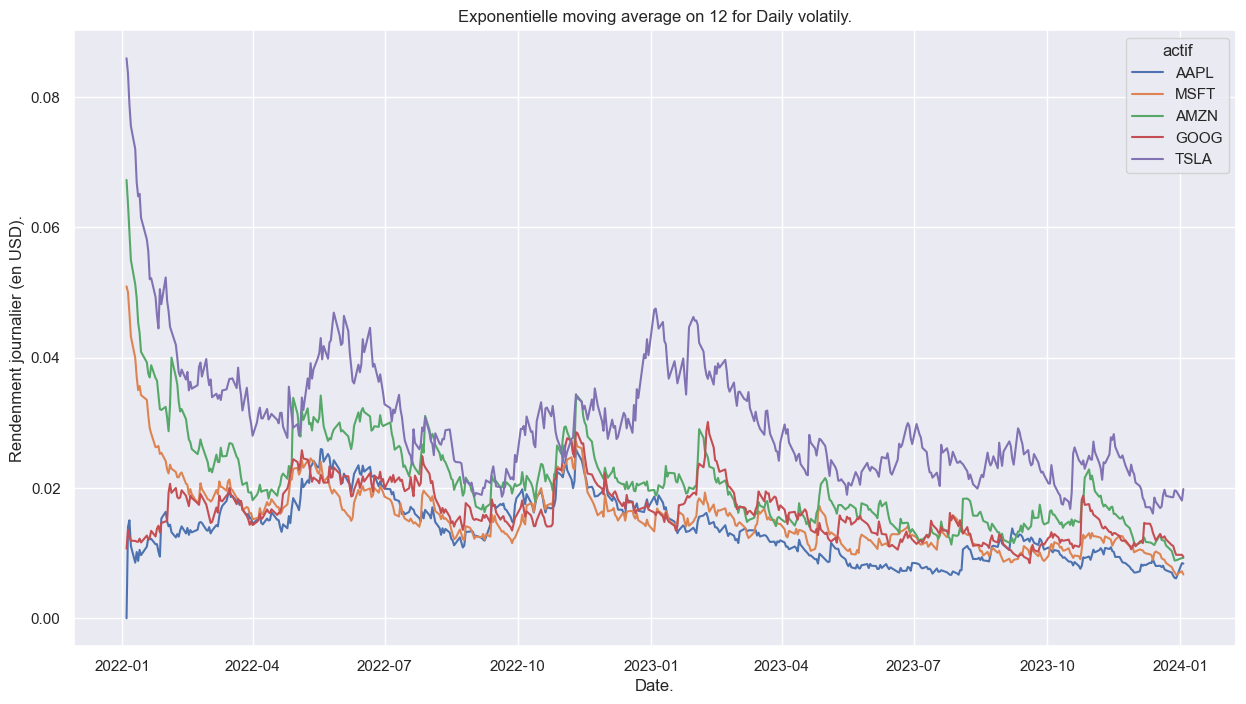

In [16]:
def smooth_model(df: pd.DataFrame) -> pd.DataFrame:
    """Smooth volatility using "Exponential moving average" model.

    Écrire une fonction pour calculer la Moyenne Mobile Pondérée Exponentiellement (EWMA : Expo-
    nential Weighted Moving Average en anglais) de chaque actif. Choisissez une valeur entre 0 et 1
    pour le paramètre inconnu du modèle EWMA.

    N.B.:
        - https://towardsdatascience.com/time-series-from-scratch-exponentially-weighted-moving-averages-ewma-theory-and-implementation-607661d574fe
        - https://github.com/BessieChen/Python-for-Financial-Analysis-and-Algorithmic-Trading/blob/master/08-Time-Series-Analysis/2-EWMA-Exponentially-weighted-moving-average.ipynb
        - Look nice but not sure about what column to use for EWMA.
        - Mayeb using statsmodels.EMWA will be better -> more related to the class.
        - what does "com=12" -> Smooth on 12 months?
    """
    df["Daily_volatility_ewm12"] = df.Daily_volatility.ewm(com=12).mean()
    plt.figure(figsize=(15, 8))
    plt.title("Exponentielle moving average on 12 for Daily volatily.")
    plt.ylabel("Rendenment journalier (en USD).")
    plt.xlabel("Date.")
    sns.lineplot(x=df.Date, y=df.Daily_volatility_ewm12, hue=df.actif)
    return df

df_4 = smooth_model(df=df_3)
df_4.sample(10)